In [1]:
from typing import Union, List
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np

In [2]:
def V(num: int) -> int:
    return 4*num+1

def S(num: int) -> int:
    return 2*num+1

def fG(num: int) -> int:
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"

def toBinVec(x, l=0) -> list:
    result = [int(i) for i in bin(x)[2:]]
    missing_zeros = l-len(result)
    if (missing_zeros > 0):
        for i in range(missing_zeros):
            result.insert(0, 0)
    return result

def ruleTwo(num):
    result = (num-1)/2
    r = 0
    k = 0

    while result % 2 != 0:
        result = (result-1)/2
        k+=1

    r = result/2

    if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
        return (True)
    else:
        return (False)


In [3]:
class Tree:
    def __init__(self, num_rows):
        self.num_rows = num_rows
        self.rows = []
        self.markedRows = []
        self.generate()
 
    def generate(self):
        for i in range(self.num_rows):
            row = []
            for j in range(2**i, 2**(i+1)):
                if j % 2 is 1:
                    node = Node(j)
                    row.append(node)
            self.rows.append(row)
   
    def getNode(self, label):
        row = Node.getRow(label)
        if row < self.num_rows:
            return self.rows[row][(label-(2**row+1))//2]
        return None

    def getGeom(self) -> Union[List[int], List[int], List[str]]:
        arr_x = []
        arr_y = []
        arr_colors = []
        for i, row in enumerate(self.rows):
            for j, node in enumerate(row):
                row_half = len(row) / 2
                x = 0.5 if (row_half < 1) else j-row_half+1
                arr_x.append(x)
                arr_y.append(i)
                color = "black" 
                if node.state == NodeState.ORANGE:
                    color = "orange"
                elif node.state == NodeState.BLUE:
                    color = "blue"
                arr_colors.append(color)
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
        return arr_x, arr_y, arr_colors
   
    def mark(self, label):
        node = self.getNode(label)
        if node is not None and node.state != NodeState.BLUE:
            #print("{0}".format(label))
            node.state = NodeState.ORANGE
    
    def freeze(self, label):
        node = self.getNode(label)
        if node is not None:
            node.state = NodeState.BLUE

    def checkTreeFrozen(self) -> bool:
        for row in self.rows:
            for node in row:
                if node.state == NodeState.ORANGE:
                    return False
        return True

    def checkRowMarked(self) -> int:
        #print(self.markedRows)
        for i, row in enumerate(self.rows):
            rowIsMarked = True
            for node in row:
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
                    break
            if rowIsMarked == True:
                if i not in self.markedRows:
                    self.markedRows.append(i)
                    return i            
        return -1
   
    def countMarkedNodesAboveRow(self, rowIndex) -> int:
        cnt = 0
        for row in self.rows[rowIndex+1:]:
            for node in row:
                if node.state == NodeState.ORANGE or node.state == NodeState.BLUE:
                    cnt += 1
        return cnt

    def debugTree(self):
        for row in self.rows:
            for node in row:
                print("{0}-{1}".format(node.label, node.state), end =" ")
            print('\n')

class NodeState():    
    BLACK = 1
    ORANGE = 2
    BLUE = 3


class Node:
    def __init__(self, label):
        self.tree = None
        self.row = Node.getRow(label)
        self.state = NodeState.BLACK
        self.label = label
   
    @staticmethod
    def getRow(label: int) -> int:
        return int(math.log(label,2))
 
    def setTree(self, tree: Tree):
        self.tree = tree
 
    @staticmethod
    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

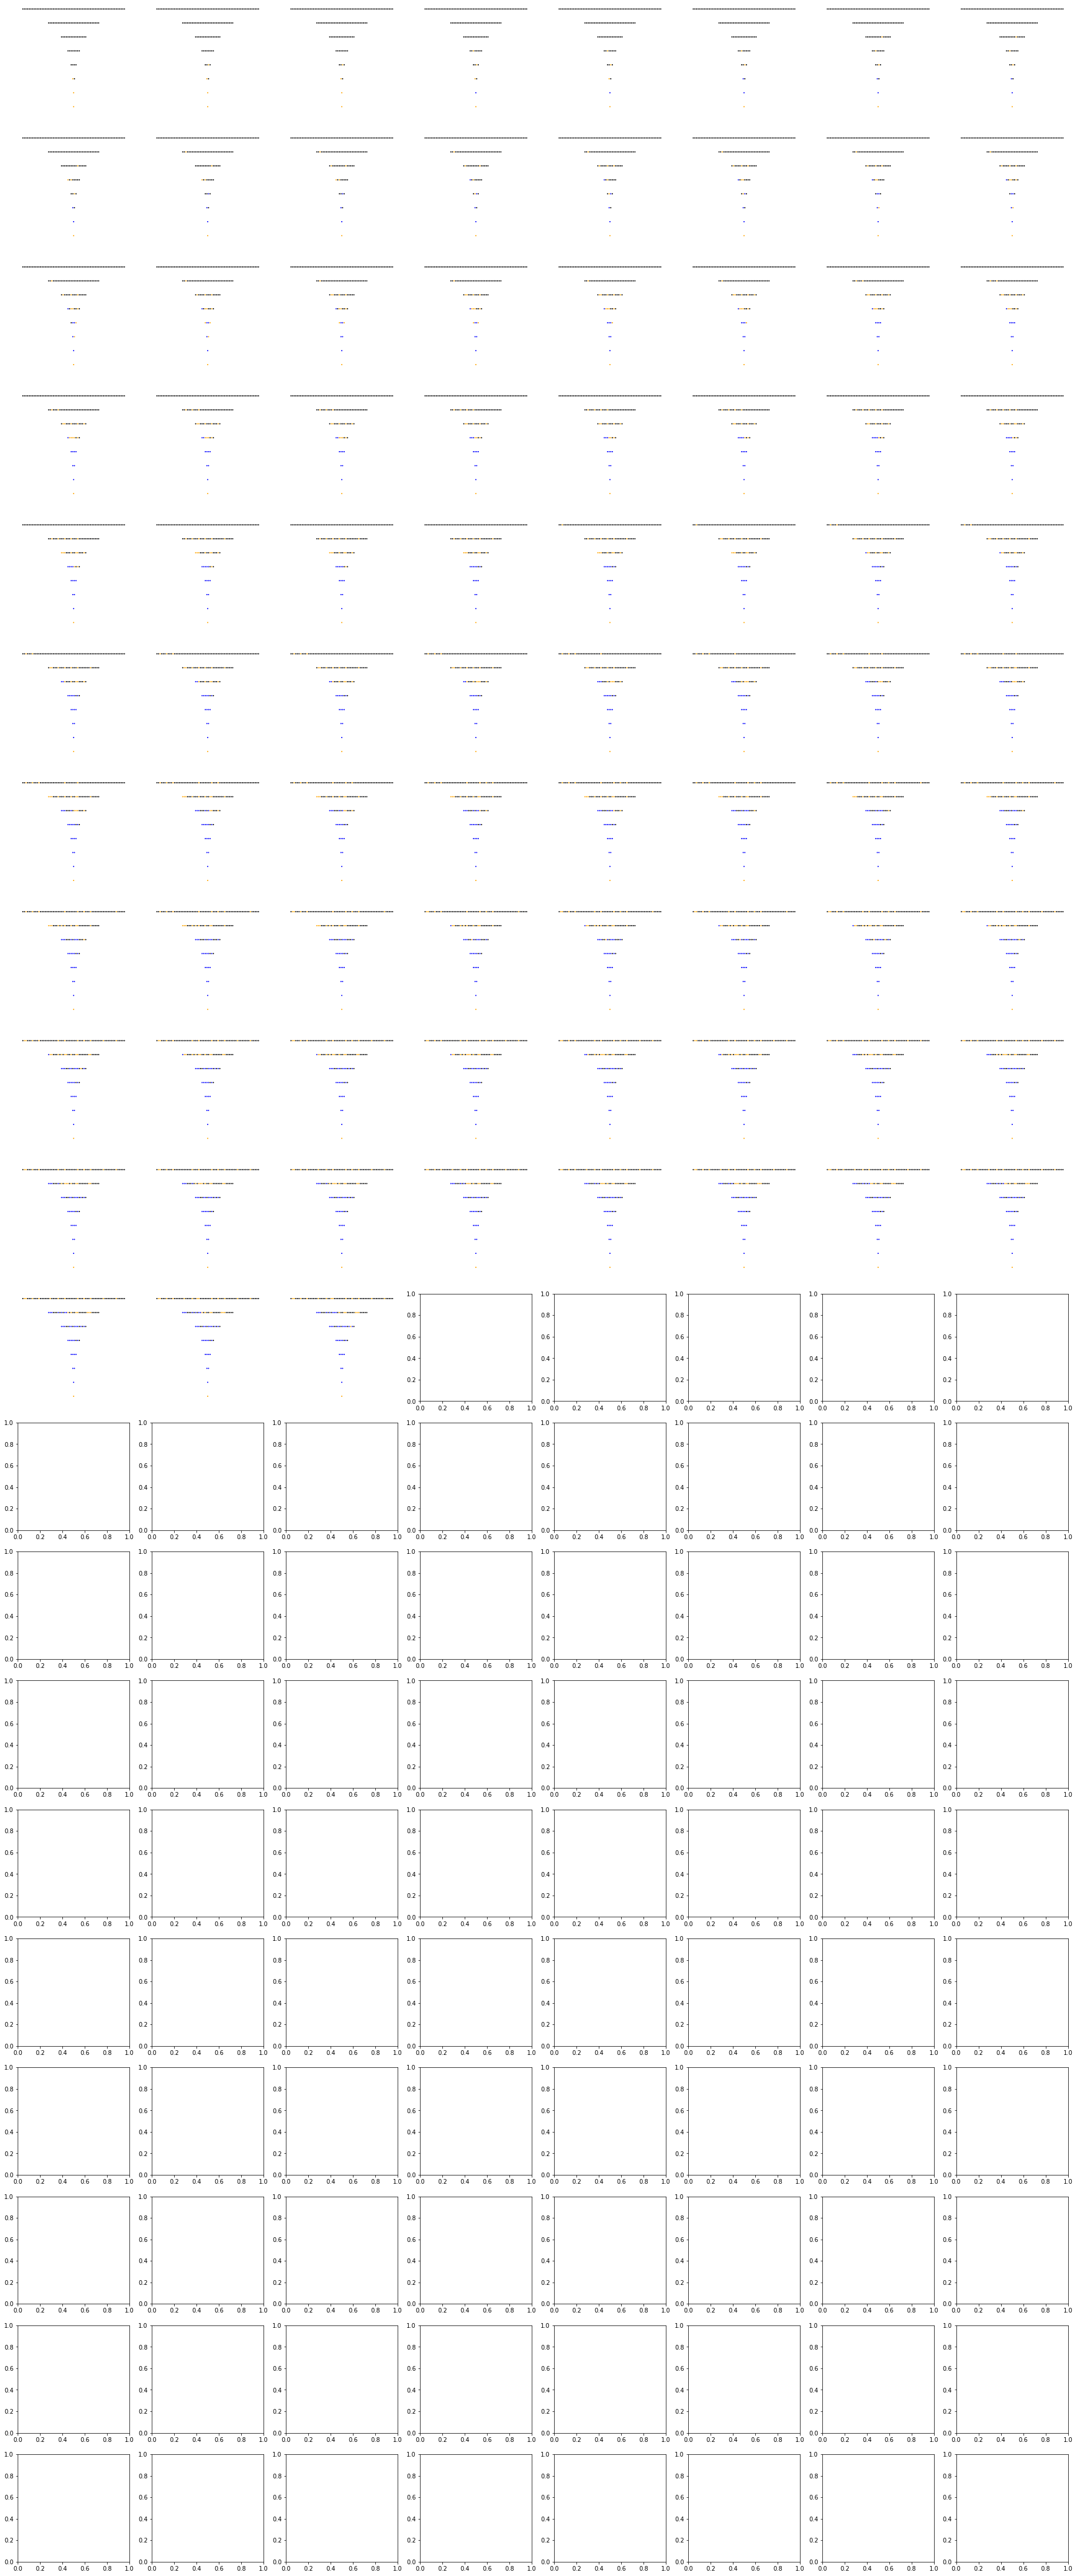

   row  expense
0    1        3
1    1        2
2    2        5
3    2        5
4    2        5
5    3        6
6    3        6
7    3        7


In [6]:
def add_subplot(ax, ax_idx: int, tree):
    x, y, colors = tree.getGeom()
    ax[ax_idx].axis('off')
    ax[ax_idx].scatter(x, y, s=1, c=colors)

n = 8
tree = Tree(n)
tree.mark(1)
tree.mark(3)
tree.mark(5)

subplot_size = 4
subplot_cols = 8
subplot_rows = 20#n//subplot_cols + 1
fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols, subplot_size*subplot_rows))
ax = ax.flatten()
x, y, colors = tree.getGeom()
ax[0].axis('off')
ax[0].scatter(x, y, s=1, c=colors)

expenses = []
iter = 0
subPlotIndex = 1

while tree.checkTreeFrozen() == False and iter < 10:   
    for i in range(3, 2**n, 2):
    
        node = tree.getNode(i)

        if node.state == NodeState.ORANGE:
            # RULE 1 : if x is orange V(x) becomes orange 
            tree.mark(V(i))

            new_marked_row = tree.checkRowMarked()
            
            if new_marked_row > 0:
                expenses.append([Node.getRow(i), tree.countMarkedNodesAboveRow(new_marked_row)])
                #node.state = NodeState.BLUE
                #add_subplot(ax, subPlotIndex, tree)
                subPlotIndex += 1
            
            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            new_marked_row = tree.checkRowMarked()
            r2 = ruleTwo(i)
            #print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
            #print(ruleTwo(23))
            if r2:
                tree.mark(S(i))
                
            if True or r2 and new_marked_row > 0:
                expenses.append([Node.getRow(i), tree.countMarkedNodesAboveRow(new_marked_row)])
                #node.state = NodeState.BLUE
                #add_subplot(ax, subPlotIndex, tree)
                subPlotIndex += 1

             

            # RULE 3 : if x is orange and of type C then (4x/3)-1 becomes orange

            if Node.getType(i) == 3:
                       
                tree.mark(int((4*i-1)/3))

                new_marked_row = tree.checkRowMarked()
                if new_marked_row > 0:
                    expenses.append([Node.getRow(i), tree.countMarkedNodesAboveRow(new_marked_row)])
                    #node.state = NodeState.BLUE
                    #add_subplot(ax, subPlotIndex, tree)
                    subPlotIndex += 1

            # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange
            
            if Node.getType(i) == 1:
                tree.mark(int(fG(i)/3))
                # print("Next Num")
                # print(fG(i)/3)
                # print(i)
                new_marked_row = tree.checkRowMarked()
                if new_marked_row > 0:
                    expenses.append([Node.getRow(i), tree.countMarkedNodesAboveRow(new_marked_row)])
                    node.state = NodeState.BLUE
                    #add_subplot(ax, subPlotIndex, tree)
                    subPlotIndex += 1        
                    break
            
            node.state = NodeState.BLUE

            #tree.debugTree()
            #print(tree.checkRowMarked())
    iter = iter+1

plt.show()
df = pd.DataFrame(expenses, columns = ['row', 'expense'])
print(df[0:n])




In [7]:
# def toBinVec(x, l=0) -> list:
#     result = [int(i) for i in bin(x)[2:]]
#     missing_zeros = l-len(result)
#     if (missing_zeros > 0):
#         for i in range(missing_zeros):
#             result.insert(0, 0)
#     return result
    
# binI = toBinVec(17)
# lenI = len(binI)
# # numToConvert = []
# # for i in binI:
# #     numToConvert.append(i)
# tail = 0

# print("binI")
# print(binI)

# for i in range(1, lenI+1):
#     if binI[lenI-i] == 1:
#         tail += 1
#         binI.pop(lenI-i)
#     #else:
# binI.append(1)
#         #break

# print("tail")
# print(tail)
# basisFour = []
# counter = 0
# save = 0
# if lenI%2 == 0:
#     for i in binI:
#         counter +=1
#         if len(binI) == 1:
#             basisFour.append(0)
#             break
#         if counter == 1:
#             save = i*2
#         elif counter == 2:
#             save += 1*i
#             counter = 0
#             basisFour.append(save)
# else:
#     counter = 1
#     for i in binI:
#         counter +=1
#         if counter == 1:
#             save = i*2
#         elif counter == 2:
#             save += 1*i
#             counter = 0
#             basisFour.append(save)

# # print("basisFour")
# # print(basisFour)

# lenBasisFour = len(basisFour)
# if basisFour[lenBasisFour-1] == 1:
#     basisFour.pop(lenBasisFour-1)

# counter = 0
# save = 0
# if len(basisFour) > 0:
#     for i in basisFour:
#         save = i*4**counter        
#         counter += 1
# # print("compare:")
# # print(tail-1)
# # print(save)

# if ((tail-1) % 2 == 0 and save % 2 == 0) or ((tail-1) % 2 != 0 and save % 2 != 0):
#     print(True)
# else:
#     print(False)

binI
[1, 0, 0, 0, 1]
tail
2
False


In [9]:
# take odd number -> apply function (x-1)/2
# if result == even: stop and div by 2 and note number (call it r) 
# if result == odd: keep going and note how many times(call it k) function (x-1)/2 was applyed define tail as k-1
# after:
# if ((tail) % 2 == 0 and r % 2 == 0) or ((tail) % 2 != 0 and r % 2 != 0):
#    print(True)
#else:
#    print(False)

def ruleTwo(num):
    result = (num-1)/2
    r = 0
    k = 0

    while result % 2 != 0:
        result = (result-1)/2
        k+=1

    r = result/2

    if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
        print(True)
    else:
        print(False)


ruleTwo(13)


False
